In [2]:
# PUNTO II

In [53]:
import os

current_directory = os.getcwd()
print(current_directory)

C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\TP03


In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer



In [73]:
# Carga el archivo Excel
#df = pd.read_excel("C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\-Big-Data-UNT--Grupo-1-\TP03\RespondieronJL.xlsx")
df = pd.read_excel(r"C:\Users\jose.lopez\OneDrive - Vicente Trapani Sa\Documents\GitHub\-Big-Data-UNT--Grupo-1-\-Big-Data-UNT--Grupo-1-\TP03\RespondieronJL.xlsx")
#
#C:\\Users\\jose.lopez\O\neDrive - Vicente Trapani Sa\\Documents\\GitHub\\-Big-Data-UNT--Grupo-1-\\TP03\\RespondieronJL.xlsx
# Muestra las primeras 5 filas del DataFrame
print(df.head())

   CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  REGION MAS_500  \
0  125463  2004          1          1           1    1      40       S   
1  125571  2004          1          1           2    1      40       S   
2  125571  2004          1          1           3    1      40       S   
3  126052  2004          1          1           1    1      40       S   
4  126052  2004          1          1           2    1      40       S   

   AGLOMERADO  PONDERA  ...  ADECCFR PONDIH  PJ1_1  PJ2_1  PJ3_1  IDIMPP  \
0          29      259  ...        4    NaN      0      0      0     0.0   
1          29      296  ...        1    NaN      0      0      0     0.0   
2          29      296  ...        1    NaN      0      0      0     0.0   
3          29      231  ...        9    NaN      0      0      0     0.0   
4          29      231  ...        9    NaN      0      0      0     0.0   

   CH05  DESOCUPADO  PEA  PET  
0   NaT           0    1    1  
1   NaT           0    1    1  
2 

In [ ]:
# METODO KNN

Año 2004 - Precisión: 0.9305373525557011
Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       710
           1       0.00      0.00      0.00        53

    accuracy                           0.93       763
   macro avg       0.47      0.50      0.48       763
weighted avg       0.87      0.93      0.90       763

Año 2004 - AUC: 0.5
Año 2024 - Precisión: 0.9523052464228935
Año 2024 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       601
           1       0.00      0.00      0.00        28

    accuracy                           0.95       629
   macro avg       0.48      0.50      0.49       629
weighted avg       0.91      0.95      0.93       629

Año 2024 - AUC: 0.5507190396957452


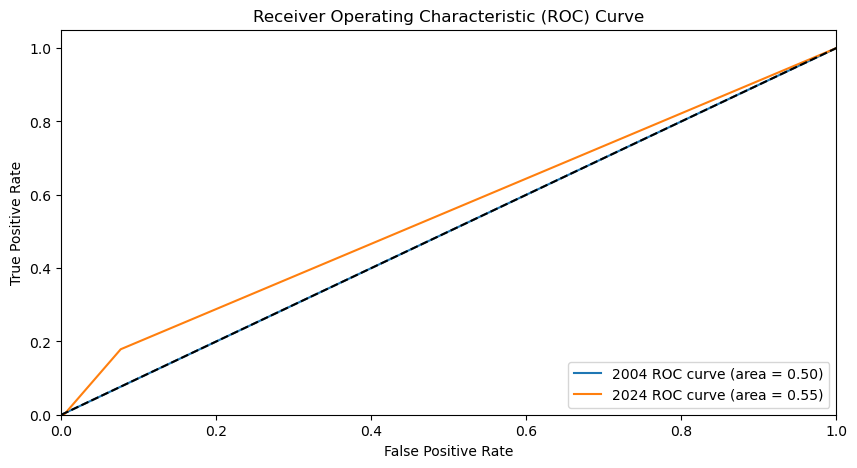

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Filtra los datos por año
df_2004 = df[df['ANO4'] == 2004]
df_2024 = df[df['ANO4'] == 2024]

# Divide los datos en variables dependientes e independientes para cada año
X_2004 = df_2004.drop('DESOCUPADO', axis=1)
y_2004 = df_2004['DESOCUPADO']
X_2024 = df_2024.drop('DESOCUPADO', axis=1)
y_2024 = df_2024['DESOCUPADO']

# Agrega una columna de unos a las variables independientes
X_2004['ones'] = 1
X_2024['ones'] = 1

# Convierte las columnas a valores numéricos y maneja los errores
for column in X_2004.columns:
    X_2004[column] = pd.to_numeric(X_2004[column], errors='coerce')
    X_2024[column] = pd.to_numeric(X_2024[column], errors='coerce')

# Elimina columnas que no tienen ningún valor observado
X_2004 = X_2004.dropna(axis=1, how='all')
X_2024 = X_2024.dropna(axis=1, how='all')

# Utiliza SimpleImputer para reemplazar los valores NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_2004 = imputer.fit_transform(X_2004)
X_2024 = imputer.fit_transform(X_2024)

# Divide los datos en conjuntos de entrenamiento y prueba para cada año
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Función para entrenar y evaluar KNN y generar la curva ROC
def train_evaluate_roc_knn(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, report, fpr, tpr, auc

# Para el año 2004
accuracy_2004, report_2004, fpr_2004, tpr_2004, auc_2004 = train_evaluate_roc_knn(X_train_2004, X_test_2004, y_train_2004, y_test_2004)
print(f'Año 2004 - Precisión: {accuracy_2004}')
print(f'Año 2004 - Reporte de Clasificación:\n{report_2004}')
print(f'Año 2004 - AUC: {auc_2004}')

# Para el año 2024
accuracy_2024, report_2024, fpr_2024, tpr_2024, auc_2024 = train_evaluate_roc_knn(X_train_2024, X_test_2024, y_train_2024, y_test_2024)
print(f'Año 2024 - Precisión: {accuracy_2024}')
print(f'Año 2024 - Reporte de Clasificación:\n{report_2024}')
print(f'Año 2024 - AUC: {auc_2024}')

# Graficar las curvas ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr_2004, tpr_2004, label=f'2004 ROC curve (area = {auc_2004:.2f})')
plt.plot(fpr_2024, tpr_2024, label=f'2024 ROC curve (area = {auc_2024:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Observamos de lo anterior que el método KNN predice mejor en el año 2024

In [ ]:
# Ahora aplicamos naive Bayes

Año 2004 - Precisión: 0.4600262123197903
Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59       710
           1       0.11      1.00      0.20        53

    accuracy                           0.46       763
   macro avg       0.56      0.71      0.40       763
weighted avg       0.94      0.46      0.56       763

Año 2024 - Precisión: 0.9554848966613673
Año 2024 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       601
           1       0.00      0.00      0.00        28

    accuracy                           0.96       629
   macro avg       0.48      0.50      0.49       629
weighted avg       0.91      0.96      0.93       629

Año 2004 - Precisión: 0.4600262123197903
Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59       710
   

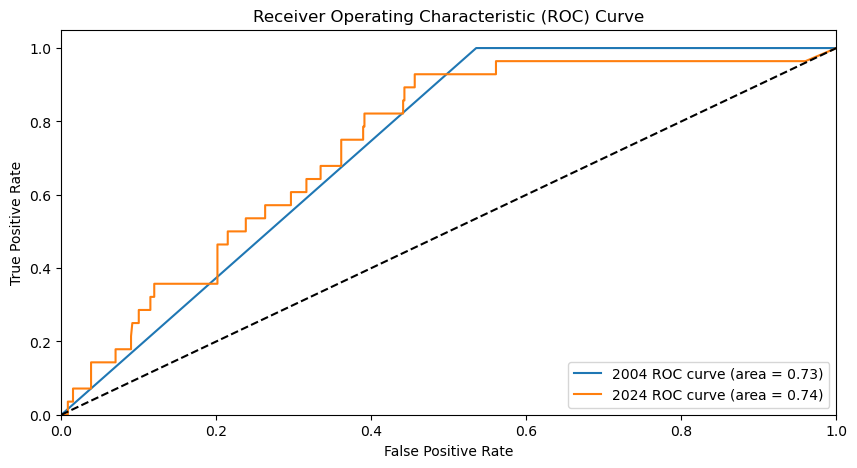

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Filtra los datos por año
df_2004 = df[df['ANO4'] == 2004]
df_2024 = df[df['ANO4'] == 2024]

# Divide los datos en variables dependientes e independientes para cada año
X_2004 = df_2004.drop('DESOCUPADO', axis=1)
y_2004 = df_2004['DESOCUPADO']
X_2024 = df_2024.drop('DESOCUPADO', axis=1)
y_2024 = df_2024['DESOCUPADO']

# Agrega una columna de unos a las variables independientes
X_2004['ones'] = 1
X_2024['ones'] = 1

# Convierte las columnas a valores numéricos y maneja los errores
for column in X_2004.columns:
    X_2004[column] = pd.to_numeric(X_2004[column], errors='coerce')
    X_2024[column] = pd.to_numeric(X_2024[column], errors='coerce')

# Elimina columnas que no tienen ningún valor observado
X_2004 = X_2004.dropna(axis=1, how='all')
X_2024 = X_2024.dropna(axis=1, how='all')

# Utiliza SimpleImputer para reemplazar los valores NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_2004 = imputer.fit_transform(X_2004)
X_2024 = imputer.fit_transform(X_2024)

# Divide los datos en conjuntos de entrenamiento y prueba para cada año
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Función para entrenar y evaluar Naive Bayes
def train_and_evaluate_nb(X_train, X_test, y_train, y_test):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    return accuracy, report

# Para el año 2004
accuracy_2004, report_2004 = train_and_evaluate_nb(X_train_2004, X_test_2004, y_train_2004, y_test_2004)
print(f'Año 2004 - Precisión: {accuracy_2004}')
print(f'Año 2004 - Reporte de Clasificación:\n{report_2004}')

# Para el año 2024
accuracy_2024, report_2024 = train_and_evaluate_nb(X_train_2024, X_test_2024, y_train_2024, y_test_2024)
print(f'Año 2024 - Precisión: {accuracy_2024}')
print(f'Año 2024 - Reporte de Clasificación:\n{report_2024}')

# Función para entrenar y evaluar Naive Bayes y generar la curva ROC
def train_evaluate_roc_nb(X_train, X_test, y_train, y_test):
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, report, fpr, tpr, auc

# Para el año 2004
accuracy_2004, report_2004, fpr_2004, tpr_2004, auc_2004 = train_evaluate_roc_nb(X_train_2004, X_test_2004, y_train_2004, y_test_2004)
print(f'Año 2004 - Precisión: {accuracy_2004}')
print(f'Año 2004 - Reporte de Clasificación:\n{report_2004}')
print(f'Año 2004 - AUC: {auc_2004}')

# Para el año 2024
accuracy_2024, report_2024, fpr_2024, tpr_2024, auc_2024 = train_evaluate_roc_nb(X_train_2024, X_test_2024, y_train_2024, y_test_2024)
print(f'Año 2024 - Precisión: {accuracy_2024}')
print(f'Año 2024 - Reporte de Clasificación:\n{report_2024}')
print(f'Año 2024 - AUC: {auc_2024}')

# Graficar las curvas ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr_2004, tpr_2004, label=f'2004 ROC curve (area = {auc_2004:.2f})')
plt.plot(fpr_2024, tpr_2024, label=f'2024 ROC curve (area = {auc_2024:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# AHORA ANALISIS DISCRIMINANTE LINEAL

Año 2004 - Precisión: 1.0
Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       1.00      1.00      1.00        53

    accuracy                           1.00       763
   macro avg       1.00      1.00      1.00       763
weighted avg       1.00      1.00      1.00       763

Año 2004 - AUC: 1.0
Año 2024 - Precisión: 0.9888712241653418
Año 2024 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       601
           1       1.00      0.75      0.86        28

    accuracy                           0.99       629
   macro avg       0.99      0.88      0.93       629
weighted avg       0.99      0.99      0.99       629

Año 2024 - AUC: 0.8928571428571429


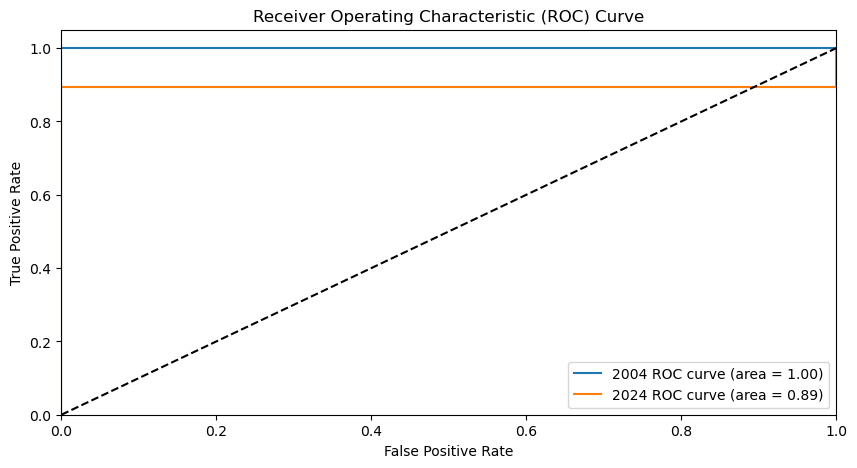

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Filtra los datos por año
df_2004 = df[df['ANO4'] == 2004]
df_2024 = df[df['ANO4'] == 2024]

# Divide los datos en variables dependientes e independientes para cada año
X_2004 = df_2004.drop('DESOCUPADO', axis=1)
y_2004 = df_2004['DESOCUPADO']
X_2024 = df_2024.drop('DESOCUPADO', axis=1)
y_2024 = df_2024['DESOCUPADO']

# Agrega una columna de unos a las variables independientes
X_2004['ones'] = 1
X_2024['ones'] = 1

# Convierte las columnas a valores numéricos y maneja los errores
for column in X_2004.columns:
    X_2004[column] = pd.to_numeric(X_2004[column], errors='coerce')
    X_2024[column] = pd.to_numeric(X_2024[column], errors='coerce')

# Elimina columnas que no tienen ningún valor observado
X_2004 = X_2004.dropna(axis=1, how='all')
X_2024 = X_2024.dropna(axis=1, how='all')

# Utiliza SimpleImputer para reemplazar los valores NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')
X_2004 = imputer.fit_transform(X_2004)
X_2024 = imputer.fit_transform(X_2024)

# Divide los datos en conjuntos de entrenamiento y prueba para cada año
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Función para entrenar y evaluar LDA y generar la curva ROC
def train_evaluate_roc_lda(X_train, X_test, y_train, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    y_prob = lda.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, report, fpr, tpr, auc

# Para el año 2004
accuracy_2004, report_2004, fpr_2004, tpr_2004, auc_2004 = train_evaluate_roc_lda(X_train_2004, X_test_2004, y_train_2004, y_test_2004)
print(f'Año 2004 - Precisión: {accuracy_2004}')
print(f'Año 2004 - Reporte de Clasificación:\n{report_2004}')
print(f'Año 2004 - AUC: {auc_2004}')

# Para el año 2024
accuracy_2024, report_2024, fpr_2024, tpr_2024, auc_2024 = train_evaluate_roc_lda(X_train_2024, X_test_2024, y_train_2024, y_test_2024)
print(f'Año 2024 - Precisión: {accuracy_2024}')
print(f'Año 2024 - Reporte de Clasificación:\n{report_2024}')
print(f'Año 2024 - AUC: {auc_2024}')

# Graficar las curvas ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr_2004, tpr_2004, label=f'2004 ROC curve (area = {auc_2004:.2f})')
plt.plot(fpr_2024, tpr_2024, label=f'2024 ROC curve (area = {auc_2024:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# REGRESION LOGISTICA

Año 2004 - Precisión: 0.9305373525557011
Año 2004 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       710
           1       0.00      0.00      0.00        53

    accuracy                           0.93       763
   macro avg       0.47      0.50      0.48       763
weighted avg       0.87      0.93      0.90       763

Año 2004 - AUC: 0.5
Año 2024 - Precisión: 0.7138314785373608
Año 2024 - Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       601
           1       0.01      0.07      0.02        28

    accuracy                           0.71       629
   macro avg       0.48      0.41      0.43       629
weighted avg       0.90      0.71      0.80       629

Año 2024 - AUC: 0.4465474209650583


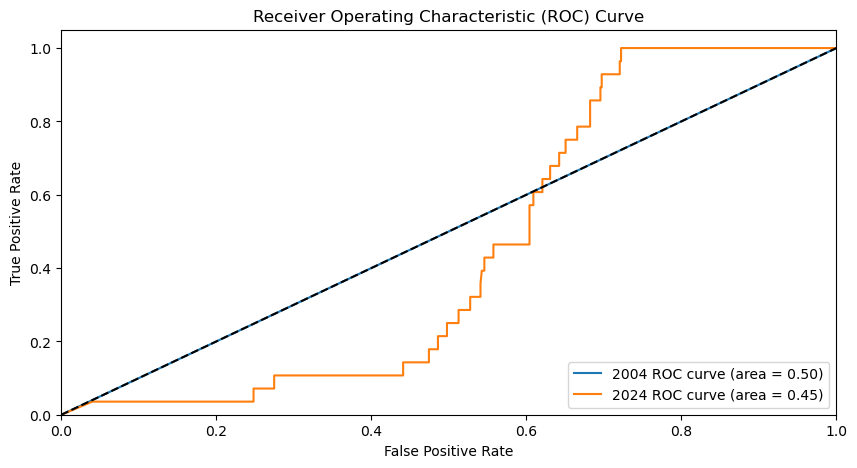

In [113]:
from sklearn.linear_model import LogisticRegression

# Función para entrenar y evaluar la regresión logística y generar la curva ROC
def train_evaluate_roc_lr(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    y_prob = lr.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    return accuracy, report, fpr, tpr, auc

# Para el año 2004
accuracy_2004, report_2004, fpr_2004, tpr_2004, auc_2004 = train_evaluate_roc_lr(X_train_2004, X_test_2004, y_train_2004, y_test_2004)
print(f'Año 2004 - Precisión: {accuracy_2004}')
print(f'Año 2004 - Reporte de Clasificación:\n{report_2004}')
print(f'Año 2004 - AUC: {auc_2004}')

# Para el año 2024
accuracy_2024, report_2024, fpr_2024, tpr_2024, auc_2024 = train_evaluate_roc_lr(X_train_2024, X_test_2024, y_train_2024, y_test_2024)
print(f'Año 2024 - Precisión: {accuracy_2024}')
print(f'Año 2024 - Reporte de Clasificación:\n{report_2024}')
print(f'Año 2024 - AUC: {auc_2024}')

# Graficar las curvas ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr_2004, tpr_2004, label=f'2004 ROC curve (area = {auc_2004:.2f})')
plt.plot(fpr_2024, tpr_2024, label=f'2024 ROC curve (area = {auc_2024:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()